In [2]:
using Interact
using Reactive
using Gadfly
using Sundials
import PyPlot

# Nonlinear Dynamics Final Exam

* [Problem 1](#Problem-1)
* [Problem 2](#Problem-2)
* [Problem 3](#Problem-3)
* [Problem 4](#Problem-4)

# Problem 1

Draw the phase portrait for the system

$$
\begin{align}
\dot{x} & = x \left( x^2 + y^2 - 2 \right)\\
\dot{y} & = - y \left( x^2 + y^2 - 3 x + 1 \right)\\
\end{align}
$$

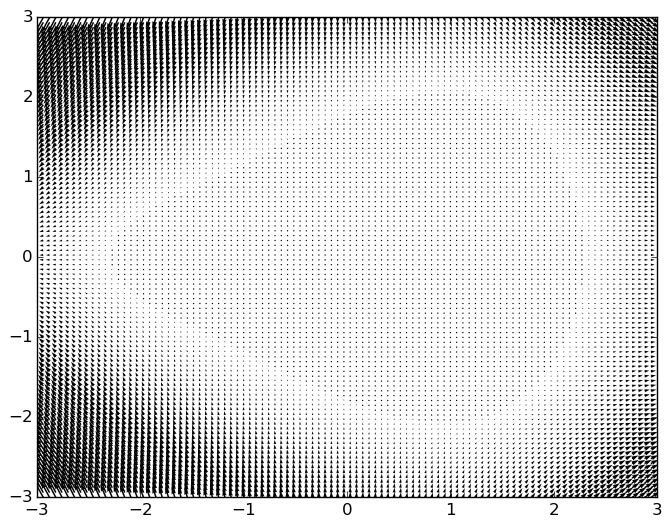

In [3]:
X = linspace(-3,3,100) * ones(100)';
Y = ones(100) * linspace(-3,3,100)';
PyPlot.quiver(X,Y,X .* (X .^2 + Y .^2 - 2.0), -Y .* (X.^2 + Y.^2 - 3*X + 1.0));

That wasn't particularly enlightening.  I think that we should analyze it a bit more.

## A Certain Symmetry

Suppose we substitute $-y$ for $y$ whenever we see it in the equations of motion.

$$
\begin{align}
\dot{x} & = x \left( x^2 + (-y)^2 - 2 \right)\\
\dot{-y} & = -( -y) \left( x^2 + (-y)^2 - 3 x + 1 \right)\\
\end{align}
$$

which reduces to:

$$
\begin{align}
\dot{x} & = x \left( x^2 + y^2 - 2 \right)\\
\dot{y} & = - y \left( x^2 + y^2 - 3 x + 1 \right)\\
\end{align}
$$

We conclude that the system is symmetric about the x-axis.

## Nullclines

We search for x-nullclines.  If $0 = x \left( x^2 + y^2 - 2 \right)$, then either $x = 0$ or $x^2 + y^2 = 2$.

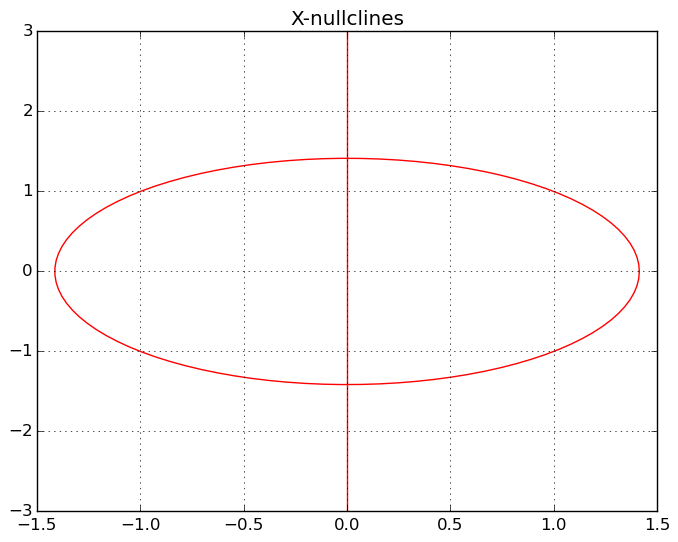

In [4]:
PyPlot.plot(zeros(100),linspace(-3,3,100),color="red"); PyPlot.grid(true);
PyPlot.plot(sqrt(2)*cos(linspace(0,2*π)), sqrt(2)*sin(linspace(0,2*π)),color="red")
PyPlot.title("X-nullclines");

We search for y-nullclines.  If $0 = -y(x^2 + y^2 - 3x + 1)$, then either $y=0$ or $x^2 + y^2 - 3x + 1 = 0$.  Completing the square, we find that this implies $(x - \frac{3}{2})^2 + y^2 = \frac{5}{4}$.  Therefore, we can plot the y-nullclines:

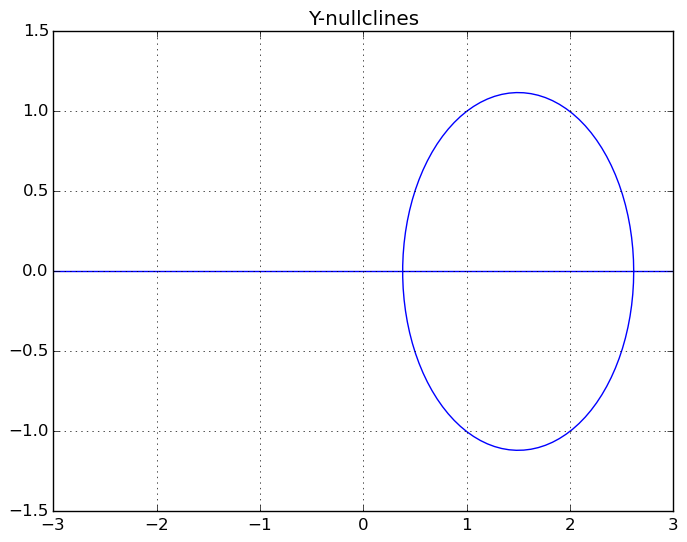

In [5]:
PyPlot.plot(linspace(-3,3,100),zeros(100),color="blue"); PyPlot.grid(true);
PyPlot.plot(sqrt(5.0/4.0)*cos(linspace(0,2*π)) + 1.5, sqrt(5.0/4.0)*sin(linspace(0,2*π)),color="blue")
PyPlot.title("Y-nullclines");

Overlaying the two sets of nullclines onto one graph, we see:

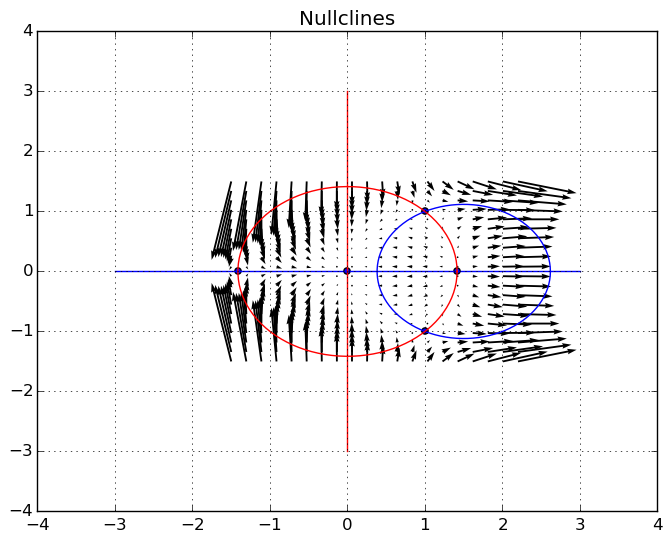

PyObject <matplotlib.quiver.Quiver object at 0xa9aa71ec>

In [6]:
PyPlot.plot(linspace(-3,3,100),zeros(100),color="blue"); PyPlot.grid(true);
PyPlot.plot(sqrt(5.0/4.0)*cos(linspace(0,2*π)) + 1.5, sqrt(5.0/4.0)*sin(linspace(0,2*π)),color="blue")
PyPlot.plot(zeros(100),linspace(-3,3,100),color="red"); PyPlot.grid(true);
PyPlot.plot(sqrt(2)*cos(linspace(0,2*π)), sqrt(2)*sin(linspace(0,2*π)),color="red")
PyPlot.scatter([0.0, 1.0, 1.0, sqrt(2.0), -sqrt(2.0)],[0.0, 1.0, -1.0, 0.0, 0.0])
PyPlot.title("Nullclines");
X = linspace(-1.5,2.2,20) * ones(20)';
Y = ones(20) * linspace(-1.5,1.5,20)';
PyPlot.quiver(X,Y,X .* (X .^2 + Y .^2 - 2.0), -Y .* (X.^2 + Y.^2 - 3*X + 1.0))

We see intersections at $(0,0), (\pm \sqrt{2},0), (1, \pm 1)$.

## Fixed Points

Recall that our system is:

$$
\begin{align}
\dot{x} & = x \left( x^2 + y^2 - 2 \right)\\
\dot{y} & = - y \left( x^2 + y^2 - 3 x + 1 \right)\\
\end{align}
$$

We find that it has jacobian:

$$
J(x,y) = \left( \begin{array}{cc}
3 x^2 + 2 y^2 - 2 & 2 x y \\
3 y - 2 y x & 3x - x^2 - 3 y^2 - 1\\
\end{array} \right)
$$

In [7]:
function Jacobian(x,y)
    [ 3*x^2 + 2*y^2 - 2  2*x.*y; 3*y - 2*x.*y 3*x - x.^2 - 3*y.^2 - 1]
end

Jacobian (generic function with 1 method)

### The Fixed Point $(0,0)$

We start by analyzing the fixed point at the origin.

In [8]:
Jacobian(0,0)

2x2 Array{Int32,2}:
 -2   0
  0  -1

Thus, the jacobian has eigenvector $(1,0)$ with eigenvalue $-2$ and eigenvector $(0,1)$ with eigenvalue $-1$.  The origin is a stable fixed point.

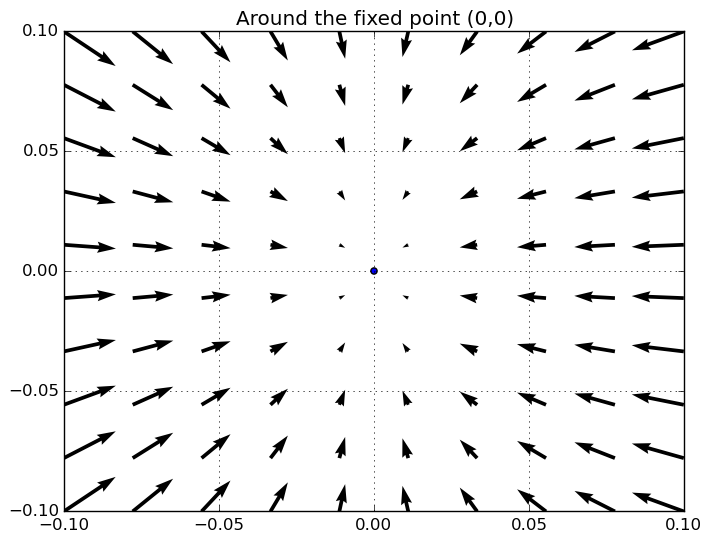

In [9]:
X = linspace(-0.1,0.1,10) * ones(10)'; PyPlot.grid(true);
Y = ones(10) * linspace(-0.1,0.1,10)'; PyPlot.title("Around the fixed point (0,0)"); PyPlot.scatter([0.0],[0.0]);
PyPlot.quiver(X,Y,X .* (X .^2 + Y .^2 - 2.0), -Y .* (X.^2 + Y.^2 - 3*X + 1.0)); PyPlot.axis([-0.1,0.1,-0.1,0.1]);

### The Fixed Points $(\pm \sqrt{2}, 0)$

Next, we analyze the intersections of the circle centered at the origin with the x-axis, the fixed points $(\pm \sqrt{2}, 0)$.

Analytically, we determine that
$ J(\pm \sqrt{2}, 0) = \left( \begin{array}{cc} 4 & 0 
\\ 0 & 3(\pm \sqrt{2} - 1)\\ \end{array} \right)$

The eigenvectors here are also $(1,0)$ and $(0,1)$.  For $(- \sqrt{2}, 0)$,
the fixed point repels in the x-direction but attracts in the y-direction.
For $(+ \sqrt{2}, 0)$, the fixed point repels in both directions.

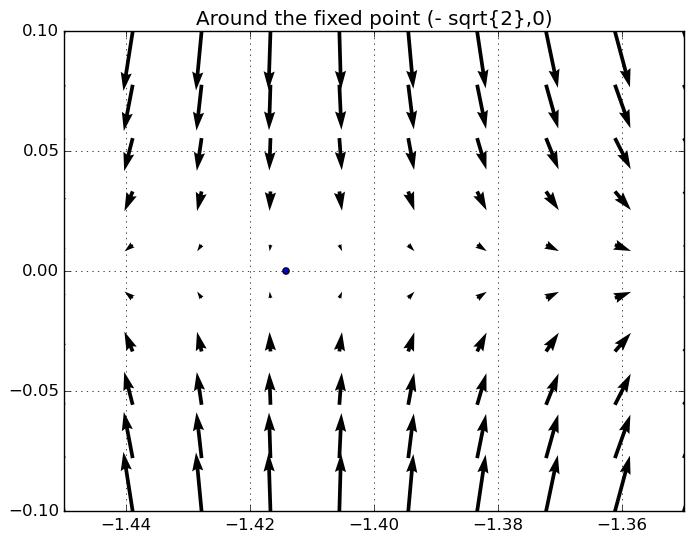

In [10]:
X = linspace(-1.45,-1.35,10) * ones(10)'; PyPlot.grid(true);
Y = ones(10) * linspace(-0.1,0.1,10)'; PyPlot.title("Around the fixed point (- \sqrt{2},0)"); PyPlot.scatter([-sqrt(2.0)],[0]);
PyPlot.quiver(X,Y,X .* (X .^2 + Y .^2 - 2.0), -Y .* (X.^2 + Y.^2 - 3*X + 1.0)); PyPlot.axis([-1.45,-1.35,-0.1,0.1]);

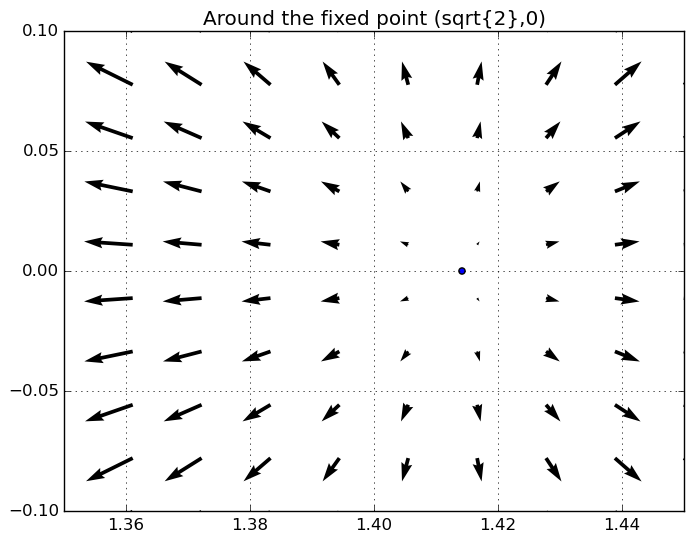

In [11]:
X = linspace(1.35,1.45,10) * ones(10)'; PyPlot.grid(true);
Y = ones(10) * linspace(-0.1,0.1,10)'; PyPlot.title("Around the fixed point (\sqrt{2},0)"); PyPlot.scatter([sqrt(2.0)],[0]);
PyPlot.quiver(X,Y,X .* (X .^2 + Y .^2 - 2.0), -Y .* (X.^2 + Y.^2 - 3*X + 1.0)); PyPlot.axis([1.35,1.45,-0.1,0.1]);

### The fixed points $(1, \pm 1)$

Finally, we analyze the fixed points $(1,\pm 1)$

In [12]:
Jacobian(1,1)

2x2 Array{Int32,2}:
 3   2
 1  -2

In [13]:
Jacobian(1,-1)

2x2 Array{Int32,2}:
  3  -2
 -1  -2

Notice that these two matrices have the same determinant and trace.
$\Delta = -8$, $\tau = 1$.  Therefore, they have the same eigenvalues:

$$\lambda_\pm = \frac{1}{2} \pm \sqrt{ \frac{33}{4} }$$

Becuse of the symmetry, the eigenvectors should be mirror images of each other, if the symmetry holds.  Specifically, if $(\alpha, \beta)$ is an eigenvector of $J(1,1)$, then the corresponding eigenvector of $J(1,-1)$ should be $(\alpha, -\beta)$.

We find that the eigenvectors of $J(1,1)$ are 
$\left( \begin{matrix} 4 \\ -5 \pm \sqrt{33} \\ \end{matrix} \right)$ with eigenvalues $\frac{1 \pm \sqrt{33}}{2}$.  Consequently, the eigenvectors of $J(1,-1)$ are $\left( \begin{matrix} 4 \\ 5 \mp \sqrt{33} \\ \end{matrix} \right)$ with the same eigenvalues.

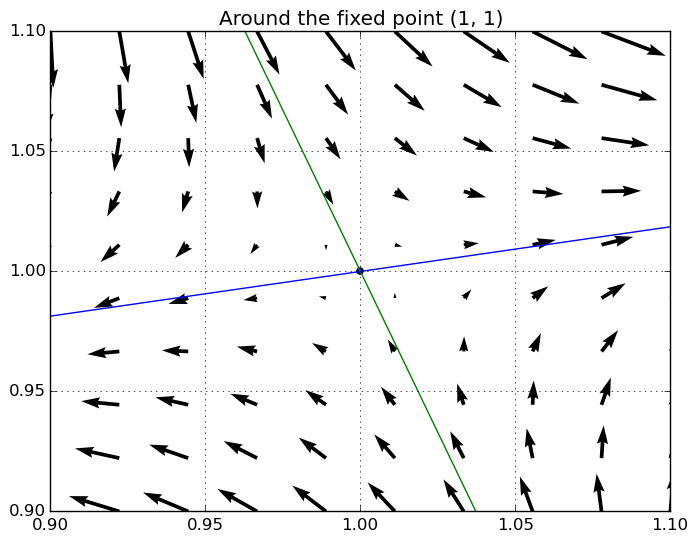

In [14]:
X = linspace(0.9,1.1,10) * ones(10)'; PyPlot.grid(true);
Y = ones(10) * linspace(0.9,1.1,10)'; PyPlot.title("Around the fixed point (1, 1)"); PyPlot.scatter([1],[1]);
PyPlot.quiver(X,Y,X .* (X .^2 + Y .^2 - 2.0), -Y .* (X.^2 + Y.^2 - 3*X + 1.0)); PyPlot.axis([0.9,1.1,0.9,1.1]);
T = linspace(-0.2,0.2)
PyPlot.plot(1 + 4*T, 1 + (-5 + sqrt(33.0))*T);
PyPlot.plot(1 + 4*T, 1 + (-5 - sqrt(33.0))*T);

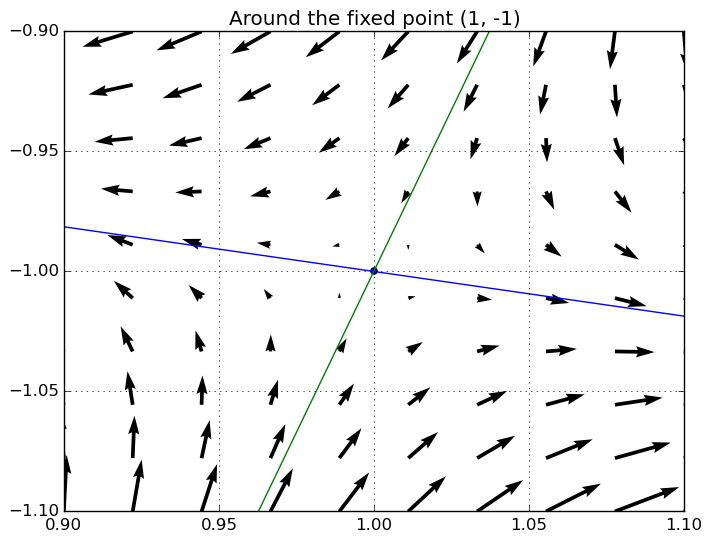

In [15]:
X = linspace(0.9,1.1,10) * ones(10)'; PyPlot.grid(true);
Y = ones(10) * linspace(-1.1,-0.9,10)'; PyPlot.title("Around the fixed point (1, -1)"); PyPlot.scatter([1],[-1]);
PyPlot.quiver(X,Y,X .* (X .^2 + Y .^2 - 2.0), -Y .* (X.^2 + Y.^2 - 3*X + 1.0)); PyPlot.axis([0.9,1.1,-1.1,-0.9]);
T = linspace(-0.2,0.2)
PyPlot.plot(1 + 4*T, -1 + (5 - sqrt(33.0))*T);
PyPlot.plot(1 + 4*T, -1 + (5 + sqrt(33.0))*T);

Notice that the two phase portraits are mirror images of each other.

## Stable Manifolds

We want to find the stable manifolds of the system.  These are trajectories which connect fixed points to other fixed points.  We can accomplish this by integrating a trajectory starting at every repelling direction.

In [16]:
function problem1(t, X, Xdot)
    Xdot[1] = X[1] .* ( X[1].^2 + X[2].^2 - 2.0)
    Xdot[2] = -X[2] .* ( X[1] .^2 + X[2] .^2 - 3.0*X[1] + 1.0)
end

problem1 (generic function with 1 method)

In [17]:
function problem1_backwards(t,X,Xdot)
    Xdot[1] = -X[1] .* ( X[1].^2 + X[2].^2 - 2.0)
    Xdot[2] = X[2] .* ( X[1] .^2 + X[2] .^2 - 3.0*X[1] + 1.0)
end

problem1_backwards (generic function with 1 method)

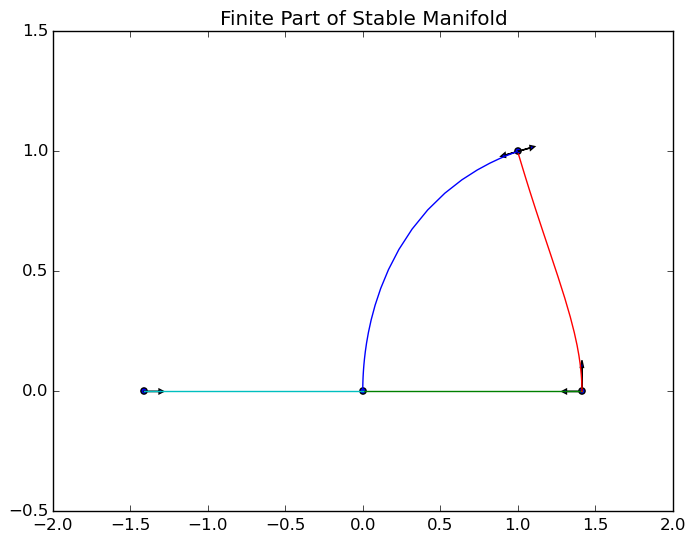

In [18]:
n = 50
m = 4
initial_points = [ 1-4*0.1 1-(-5 + sqrt(33.0)*0.1)]
time = linspace(0,10.0,n)
stable_manifolds = zeros(n,2,m)

stable_manifolds[:,:,1] = Sundials.cvode(problem1, [1-4*0.001, 1-(-5 + sqrt(33.0))*0.001], time);
stable_manifolds[:,:,2] = Sundials.cvode(problem1, [sqrt(2.0) - 0.001, 0.0], time);
stable_manifolds[:,:,3] = Sundials.cvode(problem1_backwards, [1+4*0.001, 1+(-5 - sqrt(33.0))*0.001], time);
stable_manifolds[:,:,4] = Sundials.cvode(problem1, [ -sqrt(2.0)+0.001, 0.0], time);
[ PyPlot.plot(stable_manifolds[:,1,i], stable_manifolds[:,2,i]) for i= 1:m];
PyPlot.arrow(1.0,1.0,4.0*0.02,(sqrt(33) - 5)*0.02); PyPlot.arrow(1.0,1.0,-4.0*0.02,(sqrt(33)-5)*(-0.02));
#PyPlot.arrow(1.0,1.0,4.0*0.005,(-sqrt(33) - 5)*0.005); PyPlot.arrow(1.0,1.0,-4.0*0.005,(-sqrt(33)-5)*(-0.005));
PyPlot.arrow(sqrt(2.0),0,0,0.1); PyPlot.arrow(sqrt(2.0),0,-0.1,0); PyPlot.arrow(-sqrt(2.0),0.0, 0.1,0.0);
PyPlot.scatter([-sqrt(2.0), 0.0, sqrt(2.0), 1.0],[0.0, 0.0, 0.0, 1.0]);
PyPlot.axis([-2.0,2.0,-0.5,1.5]); PyPlot.title("Finite Part of Stable Manifold");

Put all together, the phase portrait diagram looks like this now:

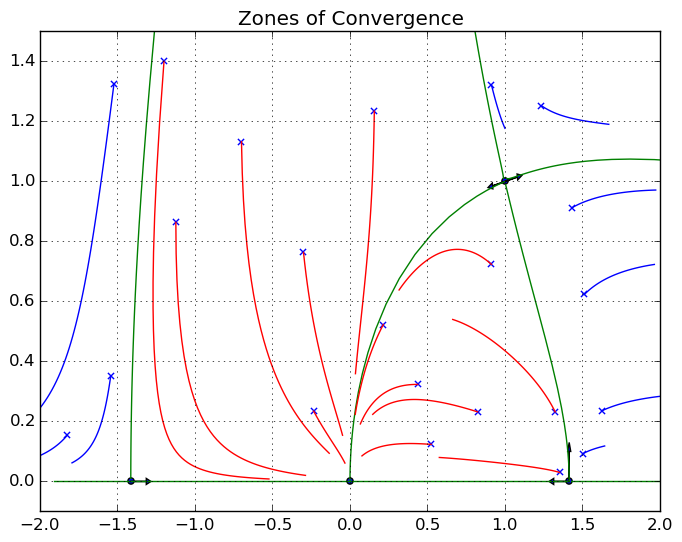

In [19]:
n = 50
m = 9
initial_points = [ 1-4*0.1 1-(-5 + sqrt(33.0)*0.1)]
time = linspace(0,10.0,n)
stable_manifolds = zeros(n,2,m)

stable_manifolds[:,:,1] = Sundials.cvode(problem1, [1-4*0.001, 1-(-5 + sqrt(33.0))*0.001], time);
stable_manifolds[:,:,2] = Sundials.cvode(problem1, [sqrt(2.0) - 0.001, 0.0], time);
stable_manifolds[:,:,3] = Sundials.cvode(problem1_backwards, [1+4*0.001, 1+(-5 - sqrt(33.0))*0.001], time);
stable_manifolds[:,:,4] = Sundials.cvode(problem1, [ -sqrt(2.0)+0.001, 0.0], time);
stable_manifolds[:,:,5] = Sundials.cvode(problem1, [-sqrt(2.0) - 0.001, 0.0], linspace(0,1.4,n));
stable_manifolds[:,:,6] = Sundials.cvode(problem1_backwards, [-sqrt(2.0), 0.01], linspace(0,0.68,n));
stable_manifolds[:,:,7] = Sundials.cvode(problem1_backwards, [0.99, 1.01], linspace(0,1.5,n));
stable_manifolds[:,:,8] = Sundials.cvode(problem1, [1.01, 1.01], linspace(0,1.5,n));
stable_manifolds[:,:,9] = Sundials.cvode(problem1, [sqrt(2.0)+0.01,0.0], linspace(0,0.9,n));
[ PyPlot.plot(stable_manifolds[:,1,i], stable_manifolds[:,2,i], color="green") for i= 1:m];
PyPlot.arrow(1.0,1.0,4.0*0.02,(sqrt(33) - 5)*0.02); PyPlot.arrow(1.0,1.0,-4.0*0.02,(sqrt(33)-5)*(-0.02));
#PyPlot.arrow(1.0,1.0,4.0*0.005,(-sqrt(33) - 5)*0.005); PyPlot.arrow(1.0,1.0,-4.0*0.005,(-sqrt(33)-5)*(-0.005));
PyPlot.arrow(sqrt(2.0),0,0,0.1); PyPlot.arrow(sqrt(2.0),0,-0.1,0); PyPlot.arrow(-sqrt(2.0),0.0, 0.1,0.0);
PyPlot.scatter([-sqrt(2.0), 0.0, sqrt(2.0), 1.0],[0.0, 0.0, 0.0, 1.0]);
PyPlot.axis([-2.0,2.0,-0.1,1.5]); PyPlot.grid(true);

starting_points = [ 0.156923 1.234; -0.2342 0.234; -1.12352 0.863463; -1.2 1.4; -0.7 1.1323; -0.3 0.76322;
    0.21523 0.52312; 0.436234 0.32342; 0.823 0.232; 0.52362 0.12351; 1.3523 0.03; 1.3235 0.23212; 0.91283 0.723452; 1.32345 -0.2342]
PyPlot.scatter(starting_points[:,1], starting_points[:,2], marker="x");
for i in 1:size(starting_points)[1]
    traj = Sundials.cvode(problem1, starting_points[i,:][:], linspace(0,1.0, n))
    PyPlot.plot(traj[:,1],traj[:,2],color="red", label="Converge to 0");
end

starting_points = [1.512351 0.62342; 1.623423 0.23512; 1.2352 1.25235; 0.912351 1.3225; 1.43225 0.91241; 
    1.502123 0.092352; -1.5232 1.3234; -1.54342  0.3523; -1.8252 0.1532]
PyPlot.scatter(starting_points[:,1], starting_points[:,2], marker="x");
for i in 1:size(starting_points)[1]
    traj = Sundials.cvode(problem1, starting_points[i,:][:], linspace(0,0.2, n))
    PyPlot.plot(traj[:,1],traj[:,2],color="blue");
end

PyPlot.title("Zones of Convergence");

Since the system is symmetric about the x-axis, the diagram is the same on the bottom.  This concludes our study of the system.

# Problem 2

## Preliminaries

We analyze the system
$$
\dot{x} = yz
$$
$$
\dot{y} = z
$$
$$
\dot{z} = -xy
$$

First, I'm going to do some numerics to compute trajectories.  I want to get a feel for what this system looks like.

In [20]:
function problem2(t, X, Xdot)
    Xdot[1] = X[2].*X[3]
    Xdot[2] = X[3]
    Xdot[3] = -X[1].*X[2]
end

problem2 (generic function with 1 method)

In [21]:
trajs = zeros(1000,3,5);
time = linspace(0,10,1000);
for i = 1:5
    trajs[:,:,i] = Sundials.cvode(problem2, [1, 1, (i-5)/2.0], time);
end

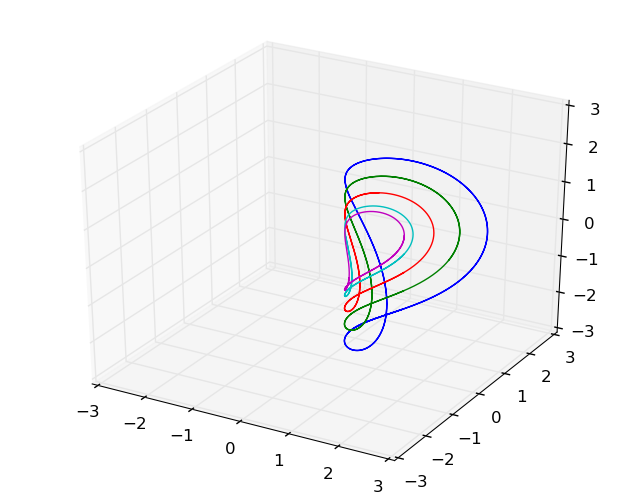

In [22]:
for i = 1:5
    PyPlot.plot3D(trajs[:,1,i],trajs[:,2,i],trajs[:,3,i]);
end
PyPlot.xlim([-3,3]); PyPlot.ylim([-3,3]); PyPlot.zlim([-3,3]);

## The First Conserved Quantity

The trajectories are closing on themselves exactly.  This makes me suspect that there is some conserved quantity.  Consider the quantity $r^2 = x^2 + z^2$.  

$$\dot{r^2} = 2 x \dot{x} + 2 z \dot{z} = -2 x y z + 2 x y z = 0$$

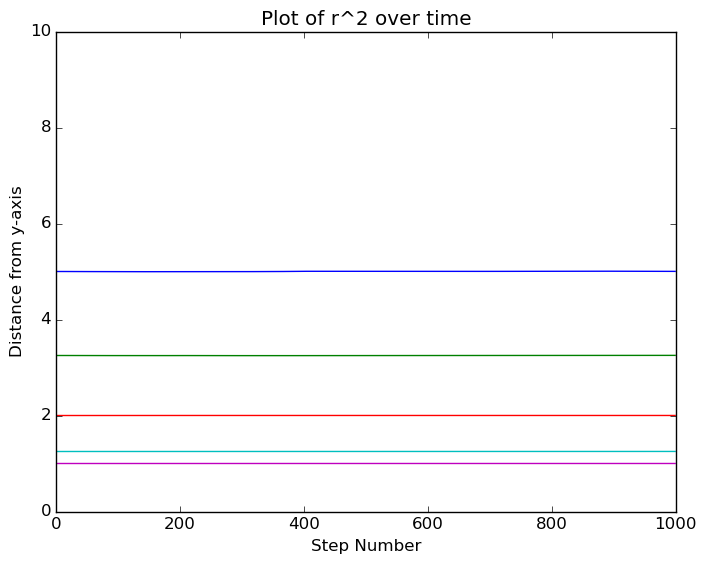

In [23]:
[ PyPlot.plot(trajs[:,1,i].^2 + trajs[:,3,i].^2) for i in 1:5];
PyPlot.title("Plot of r^2 over time"); 
PyPlot.ylabel("Distance from y-axis");
PyPlot.xlabel("Step Number"); 
PyPlot.axis([0,1000,0,10]);

As we can see, $r$ is a conserved quantity.  Every trajectory is confined to a cylinder of constant $r$, about the y-axis.  Notice that since each derivative contains $x$ or $z$, if $x = z = 0$ then that is a fixed point.

## A Change of Variables

We start to think that there might be a change of variables which expresses the dynamics on the cylinder of constant $r$.  Let $h$ and $\theta$ be dynamical variables, and let $r$ be a nonzero constant, and define a correspondence with the following rule:

$$
\begin{align*}
x & = r \cos{\theta} \\
y & = h\\
z & = r \sin{\theta}\\
\end{align*}
$$

We can from this correspondence, and the derivatives of $x$,$y$,and $z$, compute the derivatives of $h$ and $\theta$.

$$
\begin{align*}
r h \sin{\theta} & = y z & = \dot{x} & = -r \sin{\theta} \dot{\theta}\\
r \sin{\theta} & = z & = \dot{y} & = \dot{h}\\
- r h \cos{\theta} & = - x z & = \dot{z} & = r \cos{\theta} \dot{\theta}\\
\end{align*}
$$

From which we conclude:

$$
\begin{align}
\dot{h} &= r \sin{\theta}\\
\dot{\theta} &= -h
\end{align}
$$

## The Second Conserved Quantity

These equations look familiar: in fact, they are the equations for a pendulum.  The two equations can be combined into $\ddot{\theta} = -r \sin{\theta}$, which describes a pendulum with gravity-to-length ratio equal to $r$.  In this case, $\theta$ is analagous to the angle of the pendulum, while $h$ is analagous to the angular velocity (albeit in the opposite direction).

The analogy to the pendulum system suggests that we search for _another_ conserved quantity.  For our example, the potential energy would be given by $V(\theta) = - m r \cos{\theta}$, while the kinetic energy would be given by $\frac{1}{2} m \dot{\theta}^2 - m r \cos{\theta}$.  If we blindly compute the derivative of this quantity in our system:

$$
\begin{align}
\frac{d}{dt} \left[ \frac{1}{2} m \dot{\theta}^2 - m r \cos{\theta} \right]
& = m \dot{\theta} \ddot{\theta} + m r \sin{\theta} \dot{\theta}
& = m \dot{\theta} \left( \ddot{\theta} + r \sin{\theta} \right)
& = 0 \\
\end{align}
$$

Therefore, $\frac{1}{2} \dot{\theta}^2 - r \cos{\theta}$ is a conserved quantity in our system.  Since $x = r \cos{\theta}$, and $\dot{\theta} = -h = -y$, we define $E \equiv \frac{1}{2} y^2 - x$ as a conserved quantity in the original system.

We verify this from the trajectories computed earlier:

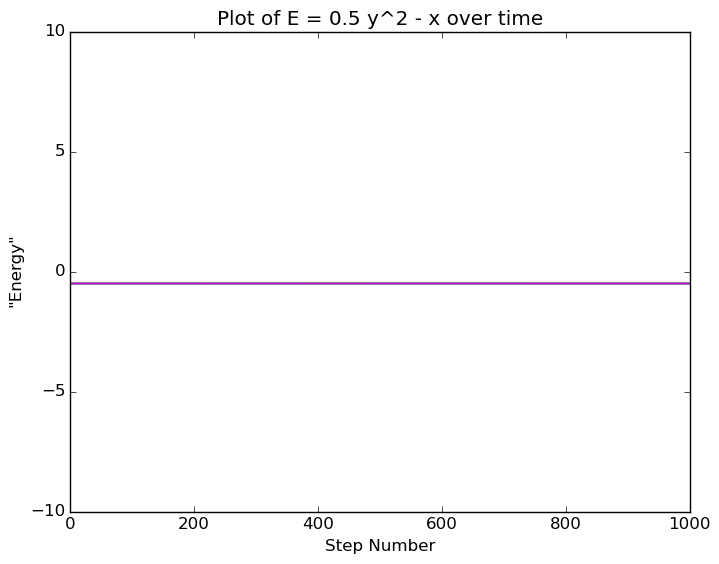

In [24]:
[ PyPlot.plot(0.5*trajs[:,2,i].^2 - trajs[:,1,i]) for i in 1:5];
PyPlot.title("Plot of E = 0.5 y^2 - x over time"); 
PyPlot.ylabel("\"Energy\"");
PyPlot.xlabel("Step Number"); 
PyPlot.axis([0,1000,-10,10]);

The trajectories are simulataneously confined to the cylinder $x^2 + z^2 = r^2$ and the parabola $\frac{1}{2} y^2 - x = E$.  This accounts for the "pringle shape" of the trajectories, and the fact that they close.  

Slider{Int32}([Input{Int32}] 1,"x",1,-8:10)

Slider{Int32}([Input{Int32}] 1,"y",1,-8:10)

Slider{Int32}([Input{Int32}] 1,"z",1,-8:10)

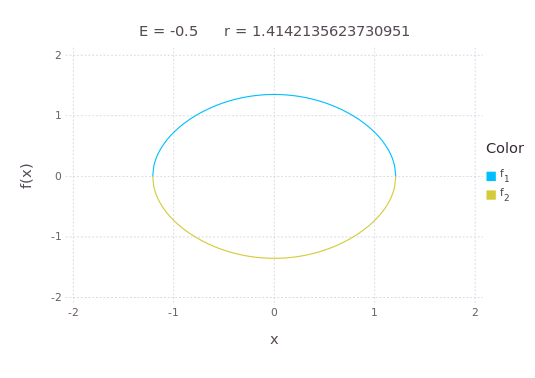

In [25]:
@manipulate for x=-8:10, y=-8:10, z=-8:10
   
    plot([θ -> sqrt(2*(0.5.*y.^2 - x) + 2.*sqrt(x.^2 + z.^2).*cos(θ)), 
          θ -> -sqrt(2*(0.5.*y.^2 - x) + 2.*sqrt(x.^2 + z.^2).*cos(θ))],
    -minimum([π, acos(- (0.5.*y.^2 - x) / sqrt(x.^2 + z.^2) )]),
    minimum([π, acos(- (0.5.*y.^2 - x) / sqrt(x.^2 + z.^2) )]), 
    Guide.title(string("E = ",0.5*y.^2 - x ," \t r = ",sqrt(x.^2 + z.^2))))
end

## The Period of a Cycle

We saw that the trajectories are confined to a 1-dimensional manifold from the numerics, and from computing two seperate conserved quantities.  Now, we try to figure out how long it takes to return to your starting point.

Notice that there are two kinds of trajectories: the ones which go around the circle of constant $r$ , and the ones which stay on the same side.

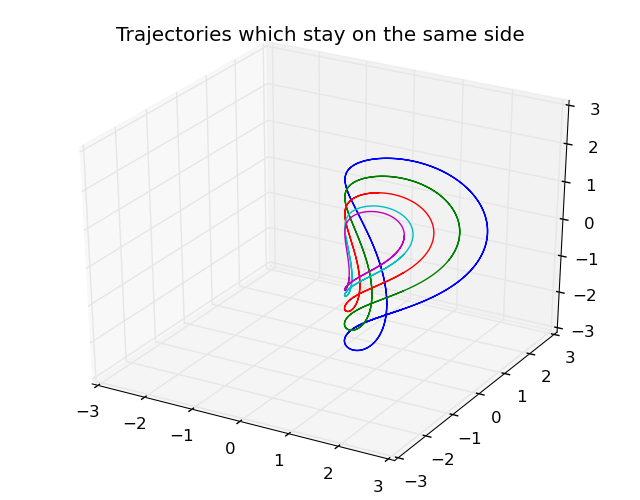

In [26]:
trajs = zeros(1000,3,5);
time = linspace(0,10,1000);
for i = 1:5
    trajs[:,:,i] = Sundials.cvode(problem2, [1, 1, (i-5)/2.0], time);
end
for i = 1:5
    PyPlot.plot3D(trajs[:,1,i],trajs[:,2,i],trajs[:,3,i]);
end
PyPlot.xlim([-3,3]); PyPlot.ylim([-3,3]); PyPlot.zlim([-3,3]);
PyPlot.title("Trajectories which stay on the same side");

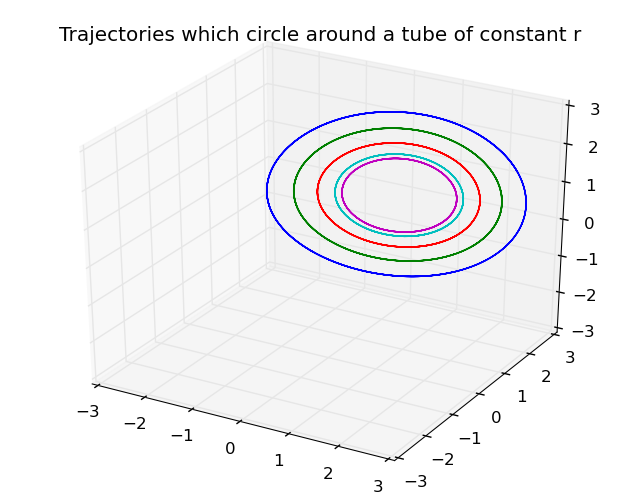

In [27]:
trajs = zeros(1000,3,5);
time = linspace(0,10,1000);
for i = 1:5
    trajs[:,:,i] = Sundials.cvode(problem2, [1, 3, (i-5)/2.0], time);
end
for i = 1:5
    PyPlot.plot3D(trajs[:,1,i],trajs[:,2,i],trajs[:,3,i]);
end
PyPlot.xlim([-3,3]); PyPlot.ylim([-3,3]); PyPlot.zlim([-3,3]);
PyPlot.title("Trajectories which circle around a tube of constant r");

Since $E = \frac{1}{2} \dot{\theta}^2 - r \cos{\theta}$, $\dot{\theta} = \pm \sqrt{ 2 E + 2 r \cos{\theta} }$.

In order to obtain the period, we separate variables.  Let's make our directions such that the rotation rate is positive.  $\frac{d\theta}{dt} = \sqrt{ 2 E + 2 r \cos{\theta}}$.  When $\frac{d\theta}{dt}$ has no zeros, the trajectory circles around the tube of constant $r$ without stopping.  Then, the period is given by 

$$T = \int_0^{2 \pi} \frac{d\theta}{\sqrt{ 2 E + 2 r \cos{\theta}}}$$.

If $\frac{d\theta}{dt}$ has a zero, then the trajectory is one of the ones which stays on the same side of the tube.  The zero of $\sqrt{2 E + 2 r \cos{\theta}}$ is at $\theta = \pm \arccos \left(-\frac{E}{r}\right)$. The trajectory starts at $\theta = 0$, goes up until $\theta$ acheieves a maximum, goes down through zero until $\theta$ achieves a minimum, then returns to zero.  This suggests that:

$$
T = 4 \int^{\arccos \left(-\frac{E}{r}\right)}_{0} \frac{d\theta}{\sqrt{ 2 E + 2 r \cos{\theta}}}
$$

In [28]:
function period(x,y,z)
    r = sqrt(x.^2 + z.^2)
    E = 0.5*y.^2 - x
    if abs(E./r) < 1.0
        T = 4.0*quadgk(θ -> 1.0/sqrt(2*E + 2*r*cos(θ)), 0, acos( -E./r))[1]
    else
        T = quadgk(θ -> 1.0/sqrt(2*E + 2*r*cos(θ)), 0, 2*π)[1]
    end
    T
end

period (generic function with 1 method)

In [29]:
@manipulate for x=-8:0.1:10, y=-8:0.1:10, z=-8:0.1:10
    T = period(x, y, z)
    html(string("<p>E = ",0.5*y.^2 - x,
                "</p><p>r = ",x.^2 + z.^2,
                "</p><p>T = ", T,"</p>"))
end

Slider{Float64}([Input{Float64}] 1.0,"x",1.0,-8.0:0.1:10.0)

Slider{Float64}([Input{Float64}] 1.0,"y",1.0,-8.0:0.1:10.0)

Slider{Float64}([Input{Float64}] 1.0,"z",1.0,-8.0:0.1:10.0)

HTML("","<p>E = -0.5</p><p>r = 2.0</p><p>T = 5.811359207981159</p>")

We want to verify the period calculation.  To do this for some initial conditions, we first calculate the period from there, then compute that far into the future.  The "Period Estimate Error" is how far off that prediction is.

Slider{Float64}([Input{Float64}] 1.0,"x",1.0,-8.0:0.1:10.0)

Slider{Float64}([Input{Float64}] 1.0,"y",1.0,-8.0:0.1:10.0)

Slider{Float64}([Input{Float64}] 1.0,"z",1.0,-8.0:0.1:10.0)

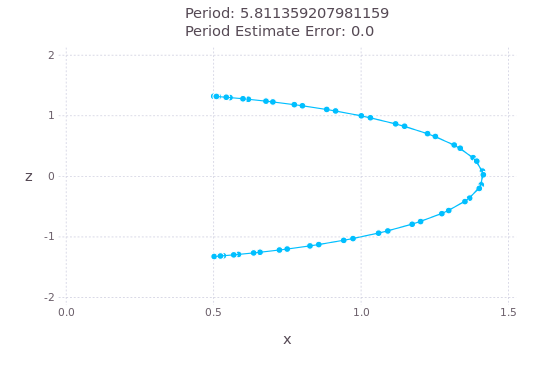

In [30]:
@manipulate for x=-8:0.1:10, y=-8:0.1:10, z=-8:0.1:10
    time = linspace(0,period(x,y,z),50)
    traj = Sundials.cvode(problem2, [x, y, z], time)
    period_estimate_error = norm(traj[50,:] - traj[50,:])
    plot(x=traj[:,1],y=traj[:,3],Geom.path,
    Geom.point,Guide.ylabel("z"),
    Guide.title(string("Period: ", period(x,y,z),
       "\nPeriod Estimate Error: ", period_estimate_error)))
end

In conclusion, we have found two conserved quantities in the system.  We have shown that starting from initial conditions $x_0, y_0, z_0$, the trajectory is confined to the region:

$$
\left\{ (x,y,z) \mid x^2 + z^2 = x_0^2 + z_0^2, \frac{1}{2} y^2 - x = \frac{1}{2} y_0^2 - x_0 \right\}
$$

We have shown that every trajectory is in a closed orbit, and we have computed the period of the orbit starting in that location.

# Problem 3

### Problem Statement

Let $a > 0$ be an arbitrary positive real number.  Consider the following sequence:

$$ 
x_1 = a
$$
$$
x_n = a^{x_{n-1}}
$$

We attempt to answer the question: "How does the long-term behavior of the sequence depend on the numerical value of $a$?"

### Finding the Fixed Points of the Map $f(x) = a^x$

We are lead to believe that the map $f(x) = a^x$ is going to be significant.  Below, we show an interactive graphic that illustrates when
there are fixed points to the map.

Slider{Float64}([Input{Float64}] 0.991,"a",0.991,0.001:0.01:1.9909999999999999)

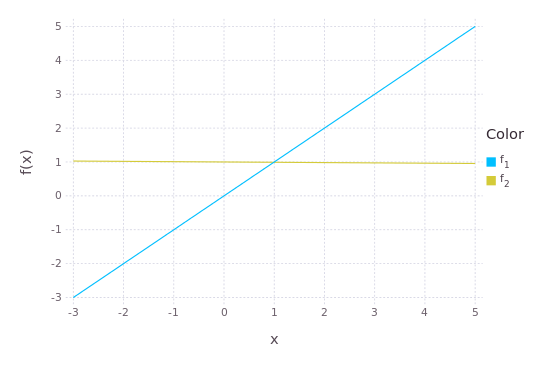

In [31]:
@manipulate for a=0.001:0.01:2
    domain = linspace(-3,5)
    plot([x -> x, x -> a.^x], -3, 5)
end

We see that there is one fixed point when $a \leq 1$.  When $a > 1$, there are sometimes two fixed points and sometimes none.  At what point do the fixed points form?  There, $f(x) = a^x$ is intersecting the diagonal tangentially.  So, $f'(x) = (\log{a} )a^x = 1$.

For what values of $a$ and $x$ do the equations $a^x = x$ and $(\log{a} )a^x = 1$ hold?  Let's try two-dimensional newton's method to start out.
The intersection looks as if it occurs near $x = 2.75$ when $a$ is about $1.5$.  We will use those values as initial guesses.

In [32]:
function F(X)
    x = X[1,1]
    a = X[2,1]
    [ a.^x - x; log(a) .* a.^x - 1.0]
end

F (generic function with 1 method)

In [33]:
function DF(X)
    x = X[1,1]
    a = X[2,1]
    [ log(a).*a.^x-1  x.*a.^(x - 1.0); log(a)^2.*a.^x log(a).*x.*a.^(x-1.0) + a.^(x - 1.0)]
end

DF (generic function with 1 method)

In [34]:
function newton(f, df, guess, tol)
    while sum(abs(f(guess))) > tol
        guess = guess - inv(df(guess)) * f(guess)
    end
    guess
end

newton (generic function with 1 method)

In [35]:
newton(F, DF, [2.75, 1.5], 1e-15)

2-element Array{Float64,1}:
 2.71828
 1.44467

Newton's method tells us that $x = 2.71828$ and $a = 1.44467$.  Those numbers look familiar...

In [36]:
e

e = 2.7182818284590...

In [37]:
a_max = e^(1.0/e)

1.444667861009766

Let's try to verify this with the original equations.  We require that $a^x = x$ and $(\log{a}) a^x = 1$.  (We can solve $x \log{a} = 1$ to simplify the calculation).

$$ a^x = \left( e^{\frac{1}{e}} \right)^e = e^\frac{e}{e} = e = x $$

$$ (\log{a}) a^x = e (\log{e^{\frac{1.0}{e}}}) = \frac{e}{e} \log{e} = 1$$

We conclude that $f(x) = a^x$ has one fixed point between $0$ and $1$ if $a \leq 1$, two fixed points, both greater than $1$, if $1 < a < e^{\frac{1}{e}}$, a single fixed point at $x = e$ if $a = e^{\frac{1}{e}}$, and no fixed points if $a > e^{\frac{1}{e}}$.

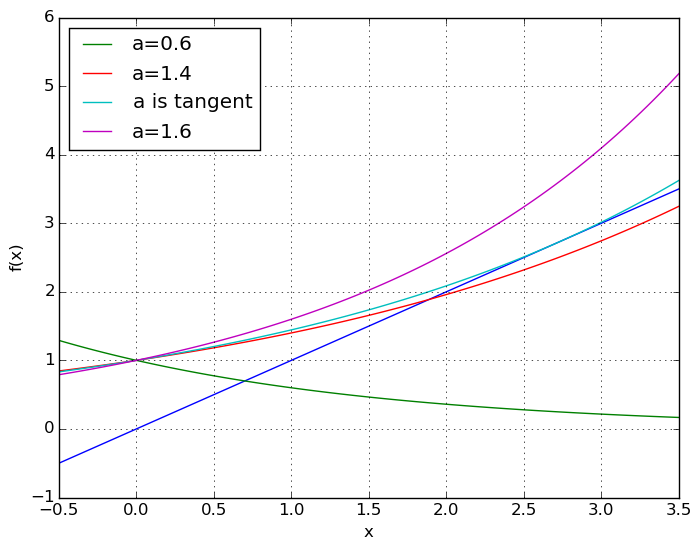

In [38]:
X = linspace(-0.5,3.5); PyPlot.grid(true);
PyPlot.plot(X,X); PyPlot.plot(X,0.6.^X,label="a=0.6"); 
PyPlot.plot(X, 1.4.^X,label="a=1.4"); PyPlot.plot(X, exp(X/e), label="a is tangent"); 
PyPlot.plot(X, 1.6.^X, label="a=1.6"); PyPlot.legend(loc=2);
PyPlot.ylabel("f(x)"); PyPlot.xlabel("x");

We can now begin to analyze the stability of the fixed points of the map $f(x) = a^x$.  The fixed points statisfy $x^* = a^{x^*}$. First, we plot the location of the lowest fixed point as a function of $a$.

Notice that the fixed point is always greater than $a$.

In [39]:
function f_at_fixed(a)
    newton(x -> a.^x - x, x -> log(a) .* a.^x - 1.0, 1.0, 1e-15)
end

f_at_fixed (generic function with 1 method)

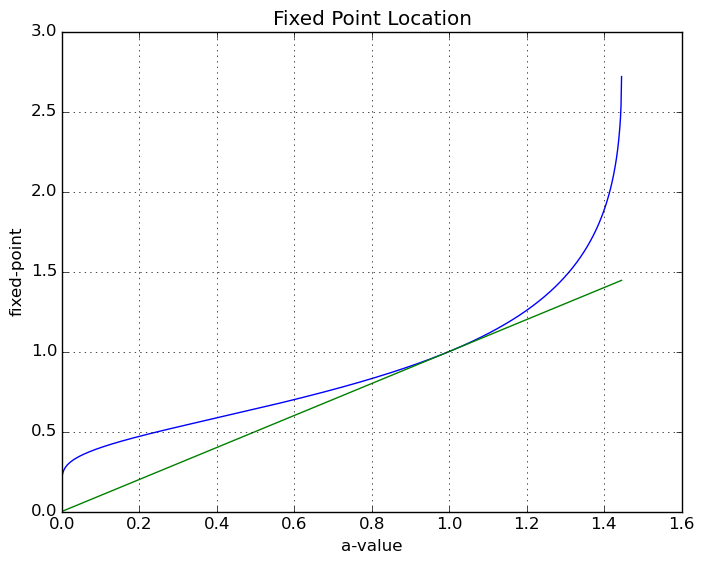

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xa90f534c>

In [40]:
PyPlot.title("Fixed Point Location"); PyPlot.grid(true);
A = linspace(0.001, a_max, 1000); PyPlot.xlabel("a-value"); 
PyPlot.ylabel("fixed-point"); PyPlot.plot(A, [ f_at_fixed(a) for a in A]); PyPlot.plot(A,A)

The derivative of the map is given by $f'(x) = a^x \log{a}$.  Therefore, $f'(x^*) = x^* \log{a}$.  We will be looking for stable fixed points where $\vert f'(x^*) \vert < 1$.  Since the exponential gets bigger than the linear function, the slope of $f(x)$ will be greater than the slope of the line (1) at the larger intersection.  We should thus focus on the smaller intersection to see when it provides us with a stable fixed point.


Using newton's method to evaluate the derivative to machine precision,
we obtain:

In [41]:
function fprime_at_fixed(a)
    newton(x -> a.^x - x, x -> log(a) .* a.^x - 1.0, 1.0, 1e-15) .* log(a) 
end

fprime_at_fixed (generic function with 1 method)

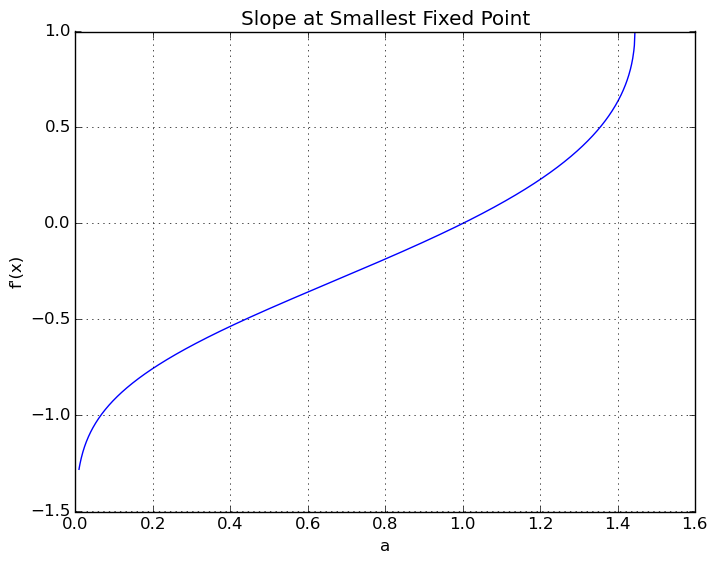

In [42]:
X = linspace(1e-2, e^(1.0/e),1000); PyPlot.grid(true)
PyPlot.plot(X, [fprime_at_fixed(x) for x in X]); PyPlot.title("Slope at Smallest Fixed Point")
PyPlot.xlabel("a"); PyPlot.ylabel("f'(x)");

At what point $(a_{min}, -1.0)$ does $f'(x)$ intersect the line $y = -1$?  If we know this point, from looking at the graph we can deduce whether the lowest fixed point is stable or unstable for a given value of $a$ by checking if $a_{min} < a < a_{max}$.

Since $f'(x) = a^x \log{a}$, and $x$ must be a fixed point, we want simultaneous solutions to the equations $a^x \log{a} = 1$ and $a^x = x$.

From looking at the graph, we should chose $a \approx 0.07$ for our initial guess.  The value of x there is:

In [43]:
a_guess = 0.07
x_guess = newton(x -> a_guess.^x - x, x -> log(a_guess) .* a_guess.^x - 1.0, 1.0, 1e-15)

0.37192832251839225

In [44]:
function Find_A_Min(Z)
    x = Z[1,1]
    a = Z[2,1]
    [1.0 + a.^x .* log(a); a.^x - x]
end

Find_A_Min (generic function with 1 method)

In [45]:
function DFind_A_Min(Z)
    x = Z[1,1]
    a = Z[2,1]
    [ log(a).^2 .* a.^x  (x.*log(a) + 1).*a.^(x-1.0); (log(a).*a.^x-1.0)  x.*a.^(x-1.0)-1.0]
end

DFind_A_Min (generic function with 1 method)

In [46]:
newton(Find_A_Min, DFind_A_Min, [x_guess, a_guess], 1e-15)

2-element Array{Float64,1}:
 0.367879
 0.065988

Again, those numbers look fairly familiar.

In [47]:
1/e

0.36787944117144233

In [48]:
exp(-e)

0.06598803584531254

Remember, we are searching for numbers $a, x$ such that $f'(x) = -1$.  Remember, $f'(x) = a^x \log{a}$.  We can substitute in the numbers that newton's method has suggested to us:

$$
a^x \log{a} = (e^{-e})^{\frac{1}{e}} \log{e^{-e}} = e^{-1} (-e) = -1
$$

We conclude that $f(x) = a^x$ has a stable fixed point if $e^{-e} < a < e^{\frac{1}{e}}$.  Numerically, $a$ must be between around 0.066 and around 1.444 for a stable fixed point to exist.

In [49]:
a_min = exp(-e)

0.06598803584531254

### Showing that if we start at $a$, $f(a) = a^x$ converges to its fixed point (under suitable conditions)

In [50]:
function make_cobweb(sequence)
    cobweb = zeros(2,2*(length(sequence)-1))
    for i in 1:(length(sequence)-1)
        cobweb[:,2*i-1] = [sequence[i] sequence[i]]
        cobweb[:,2*i] = [sequence[i] sequence[i+1]]
    end
    cobweb
end

make_cobweb (generic function with 1 method)

We use a graphical argument to show convergence.  When $a = 1.0$, the convergence is immediate.  When $a_{min} < a < a_{max}$, we converge quickly to the fixed point.  This is shown below with a cobweb.

Slider{Float64}([Input{Float64}] 0.7459880358453126,"a",0.7459880358453126,0.06598803584531254:0.01:1.4359880358453125)

Slider{Int32}([Input{Int32}] 10,"n",10,1:20)

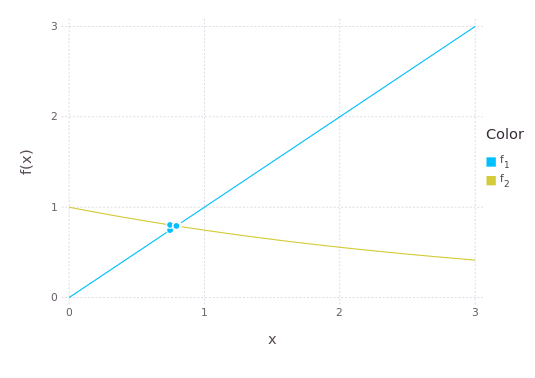

In [51]:
@manipulate for a = a_min:0.01:a_max, n = 1:20
    values = zeros(n)
    values[1] = a
    for i = 2:n
        values[i] = a.^values[i-1]
    end
    

    plot(layer(x=make_cobweb(values)[1,:], y=make_cobweb(values)[2,:], Geom.point, Geom.path),
    layer([x -> x, x -> a.^x], 0, 3 ), Guide.xlabel("x"), Guide.ylabel("f(x)"))
end    

### Period Doubling

Since a fixed point loses its stability by becoming an unstable fixed point, we guess that there will be period-doubling occuring.  We plot a spectrum of the map:

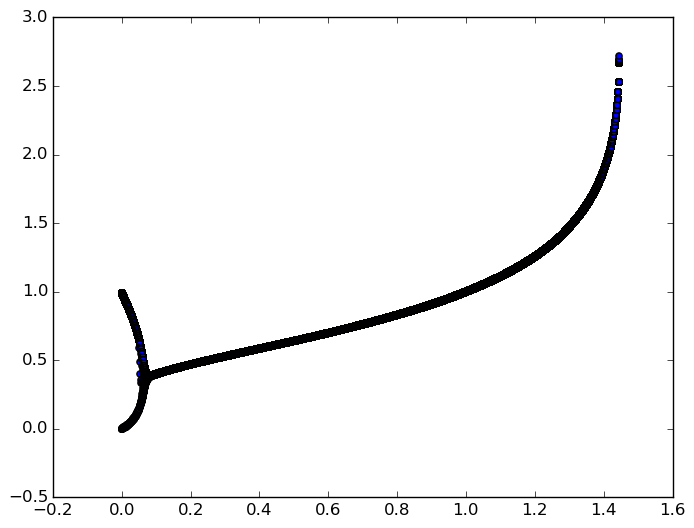

PyObject <matplotlib.collections.PathCollection object at 0xa95dd5cc>

In [52]:
n_a = 1000
n_x = 100
a = linspace(0.001, a_max, n_a)
X = ones((n_a,1)) * linspace(0,e,n_x)'
A = a * ones((n_x,1))'

for i = 1:100
    X = A.^X
end

PyPlot.scatter(A,X)

Since $f(x) = a^x$, $f^2(x) = a^{a^x}$. Below are the fixed points of that map.  Again, note that every one of the fixed points is greater than $a$.

In [53]:
function f2_at_two_cycle(a, initial)
    newton(x -> a.^(a.^x) - x, x -> log(a).^2 .*exp(log(a) .* (x + exp( log(a) .* x))) - 1.0, initial, 1e-4)
end

f2_at_two_cycle (generic function with 1 method)

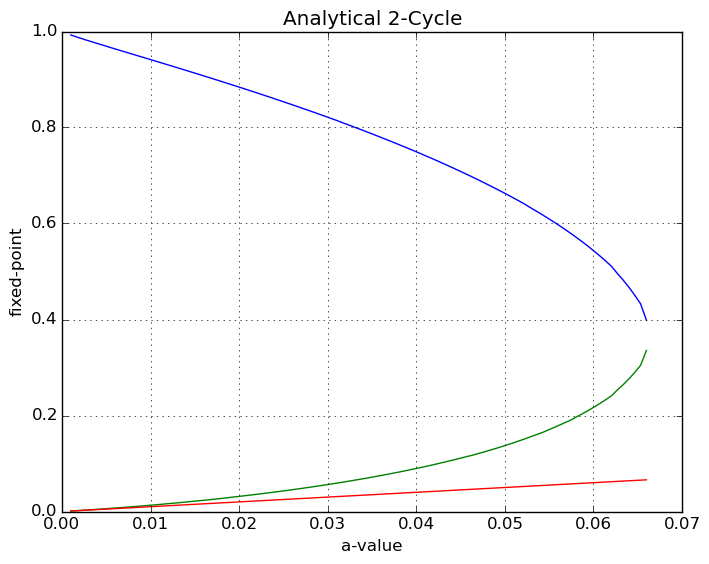

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xa7e75a4c>

In [54]:
PyPlot.title("Analytical 2-Cycle"); PyPlot.grid(true);
A = linspace(0.001, a_min, 100); PyPlot.xlabel("a-value"); 
PyPlot.ylabel("fixed-point"); 
PyPlot.plot(A, [ f2_at_two_cycle(a, 1.0- a*3.0) for a in A]);
PyPlot.plot(A, [ f2_at_two_cycle(a, 0.01 + a*3.0) for a in A]); PyPlot.plot(A,A)

Then, we compute ${f^2}'(x) = e^{ \left( x + e^{x \log{a}} \right) \log{a}} (\log{a})^2$, and inspect its value
at the fixed points.  

In [55]:
function df2_at_two_cycle(a, initial)
    x = newton(x -> a.^(a.^x) - x, x -> log(a).^2 .*exp(log(a) .* (x + exp( log(a) .* x))) - 1.0, initial, 1e-4)
    log(a).^2 .*exp(log(a) .* (x + exp( log(a) .* x)))
end

df2_at_two_cycle (generic function with 1 method)

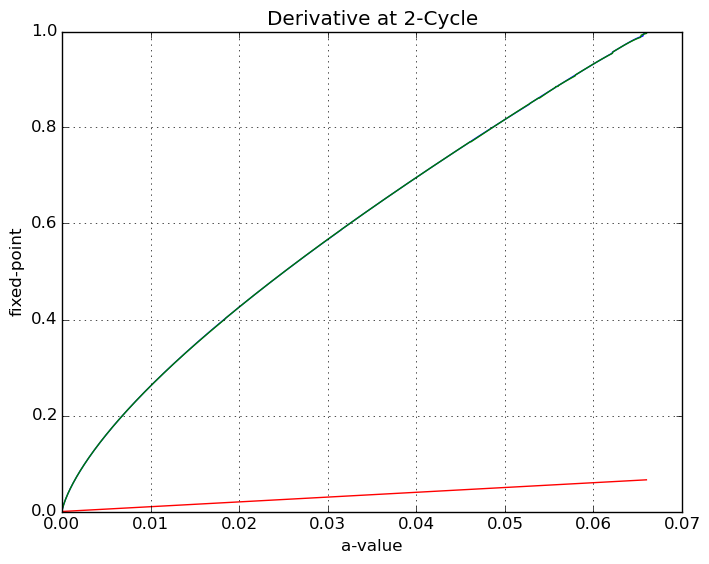

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0xa8cd99cc>

In [56]:
PyPlot.title("Derivative at 2-Cycle"); PyPlot.grid(true);
A = linspace(0.00001, a_min, 1000); PyPlot.xlabel("a-value"); 
PyPlot.ylabel("fixed-point"); 
PyPlot.plot(A, [ df2_at_two_cycle(a, 1.0- a*3.0) for a in A]);
PyPlot.plot(A, [ df2_at_two_cycle(a, 0.01 + a*3.0) for a in A]); PyPlot.plot(A,A)

We note that $f^2$'s derivative is less than 1 between 0 and the appearence of a stable one-cycle.  Notice that there are two curves which are identical, which we should expect from a two-cycle.  Therefore, when $0 < a < a_{min}$, there exists a stable two-cycle. We see from the following cobweb that it is convergent.

Slider{Float64}([Input{Float64}] 0.032010000000000004,"a",0.032010000000000004,1.0e-5:0.001:0.06501)

Slider{Int32}([Input{Int32}] 10,"n",10,1:20)

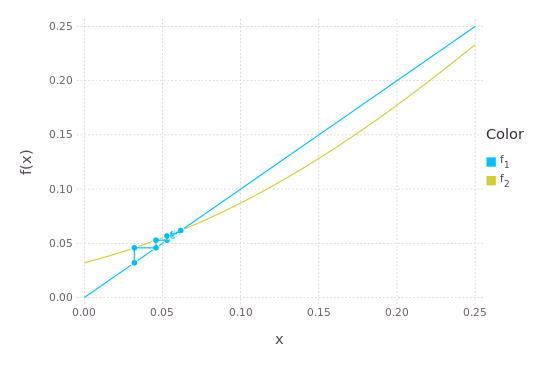

In [57]:
@manipulate for a = 1e-5:0.001:a_min, n = 1:20
    values = zeros(n)
    values[1] = a
    for i = 2:n
        values[i] = a.^(a.^values[i-1])
    end
    

    plot(layer(x=make_cobweb(values)[1,:], y=make_cobweb(values)[2,:], Geom.point, Geom.path),
    layer([x -> x, x -> a.^(a.^x)], 0, 0.25 ), Guide.xlabel("x"), Guide.ylabel("f(x)"))
end    

We have up until now analyzed the behavior of the iteration when $0 < a < a_{min}$, and when $a_{min} < a < a_{max} $.  When $a > a_{max}$, we show by cobweb that the iteration diverges, and is unbounded.

Slider{Float64}([Input{Float64}] 1.664667861009766,"a",1.664667861009766,1.444667861009766:0.01:1.894667861009766)

Slider{Int32}([Input{Int32}] 10,"n",10,1:20)

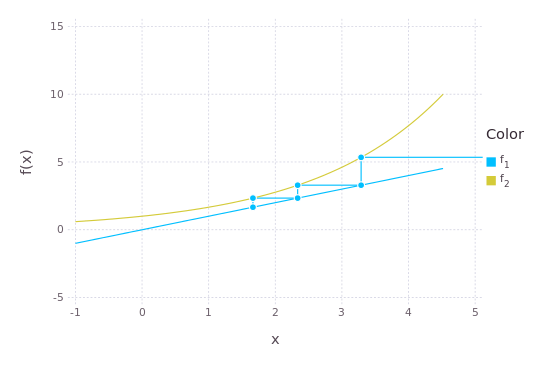

In [58]:
@manipulate for a = a_max:0.01:1.9, n = 1:20
    values = zeros(n)
    values[1] = a
    for i = 2:n
        values[i] = a.^values[i-1]
    end
    

    plot(layer(x=make_cobweb(values)[1,:], y=make_cobweb(values)[2,:], Geom.point, Geom.path),
    layer([x -> x, x -> (a.^x)], -1,log(10)/log(a)), Guide.xlabel("x"), Guide.ylabel("f(x)"))
end    

We have completely determined the behavior of the sequence $\{ x_n \}$.  If $0 < a < e^{-e}$, then a stable two-cycle forms.  If $e^{-e} < a < e^{\frac{1}{e}}$, the sequence converges to a point.  If $a > e^{\frac{1}{e}}$, the sequence goes to infinity.

In [59]:
function iterate(a,n)
    values = zeros(n)
    values[1] = a
    for i = 2:n
        values[i] = a.^values[i-1]
    end
    values
end

iterate (generic function with 1 method)

In [60]:
@manipulate for a=0.001:0.01:3.001, n_terms=5:20
    dstring = string("<div>a = ",a,"</div> <br/> ")
    if exp(-e) < a < exp(1.0/e)
        conv_word = string("converge to a value of ", f_at_fixed(a),
        "because ",exp(-e)," < ",a," < ",exp(1.0/e))
    elseif 0 < a < exp(-e)
        conv_word = string("converge to a two-cycle between ", 
            f2_at_two_cycle(a, 1.0- a*3.0),
        " and ",f2_at_two_cycle(a, 0.01 + a*3.0), " because ",0," < ",a," < ",exp(-e))
    else
        conv_word = string("diverge to infinity because ",a," > ",exp(1.0/e))
    end
    dstring *= string("<p>We predict that the sequence will ", 
        conv_word, ".</p>")
    dstring *= string("<br/><table>")
    for number in iterate(a,n_terms)
        dstring *= string("<tr><td>",number,"</td></tr>")
    end
    dstring *= "</table"
    html(dstring)
end

Slider{Float64}([Input{Float64}] 1.501,"a",1.501,0.001:0.01:3.001)

Slider{Int32}([Input{Int32}] 12,"n_terms",12,5:20)

HTML("","<div>a = 1.501</div> <br/> <p>We predict that the sequence will diverge to infinity because 1.501 > 1.444667861009766.</p><br/><table><tr><td>1.501</td></tr><tr><td>1.8397017397683884</td></tr><tr><td>2.1109982164618084</td></tr><tr><td>2.3568900705322755</td></tr><tr><td>2.6044132861023224</td></tr><tr><td>2.8798390628467763</td></tr><tr><td>3.2206831968316156</td></tr><tr><td>3.6988466961870996</td></tr><tr><td>4.49164206863689</td></tr><tr><td>6.197819689935464</td></tr><tr><td>12.392979386042587</td></tr><tr><td>153.42010762388972</td></tr></table")

## Problem 4

Consider the system:

$$
\dot{x} = x \left( b - x - \frac{y}{1 + x} \right)
$$
$$
\dot{y} = y \left( \frac{x}{1 + x} - a y \right)
$$

Since this system is used for population modeling, we restrict our attention to the region where both $x$ and $y$ are positive.

## Fixed Points

First off, we start by looking for fixed points.  We plot the nullclines.  $\dot{x}$ is zero along the line $x=0$,
and also along $y(x) = (1+x)(b-x)$.  $\dot{y}$ is zero along the line $y = 0$, and along the line $y(x) = \frac{x/a}{1+x}$.  The derivative of $y(x) = (1+x)(b-x)$ is $y'(x) = (b-1) - 2x$, and the derivative of $y(x) = \frac{1}{a} \frac{x}{1+x}$ is $y'(x) = \frac{1}{a} \frac{1}{(1 + x)^2}$.

Since $y(x) = (1+x)(b-x)$ decreases unboundedly, but starts greater than zero at x=0, while $y(x) = \frac{1}{a} \frac{x}{1+x}$ starts at zero and increases to an asymptote, the two nullclines will always intersect at least once.   But, will they intersect more times?

If $(b - x)(1+x) = \frac{1}{a} \frac{x}{1+x}$, then the intersections are the roots of the cubic equation $a (b-x)(1+x)^2 - x = 0$.  That equation will have at least one, and at most three, solutions (due to the fundamental theorem of algebra).  We thus start looking for situation in which the nullclines intersect at one, two, and three locations.

Slider{Float64}([Input{Float64}] 0.055,"a",0.055,0.01:0.001:0.1)

Slider{Float64}([Input{Float64}] 9.0,"b",9.0,-2.0:0.1:20.0)

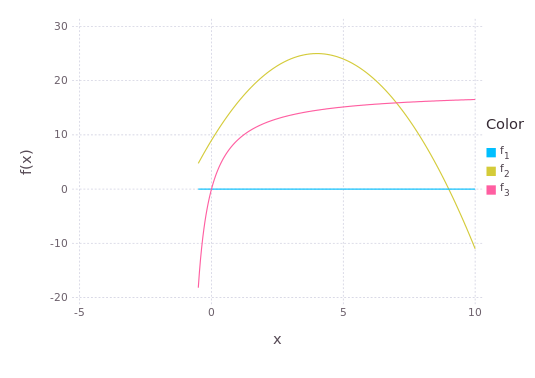

In [61]:
@manipulate for a = 0.01:0.001:0.1, b=-2.0:0.1:20.0
    plot([x -> 0.0, x -> (1+x).*(b-x), x -> (x/a)/(1.0+x)],-0.5,10)
end

How many intersections are there?  We see that there is always one intersection, but can there be any others?  Let's try to look for bifurcations where new fixed points emerge.

At a saddle-node bifurcation, the two nullclines are such that $y_1(x) = y_2(x)$, and $y_1'(x) = y_2'(x)$.

$
\begin{align}
(b-x)(1+x) & = \frac{1}{a} \frac{x}{1+x} \\
(b - 1) - 2x & = \frac{1}{a} \frac{1}{(1+x)^2}\\
\end{align}
$

We rearrange the first expression to get:

$$
\frac{b - x}{x} = \frac{1}{a} \frac{1}{(1+x)^2} = (b-1) - 2x
$$

which reduces to 

$$
x^2 - \frac{b}{2} x + \frac{b}{2} = 0
$$

which has solutions 

$$
x = \frac{1}{4} \left( b \pm \sqrt{b^2 - 8 b} \right)
$$

Note that this only has solutions if $b > 8$.
Since we know that

$$
a = \frac{x}{(1 + x)^2 (b-x)}
$$

we can write two functions $a_\pm(b)$, such that 

$$
a_\pm(b) = \frac{x_\pm(b)}{(1 + x_\pm(b))^2 (b - x_\pm(b))}
$$

In [62]:
function aplus(b)
    x = 0.25*(b + sqrt(b.^2 - 8*b))
    x./((1.0+x).^2 .* (b - x))
end
function aminus(b)
    x = 0.25*(b - sqrt(b.^2 - 8*b))
    x./((1.0+x).^2 .* (b - x))
end

aminus (generic function with 1 method)

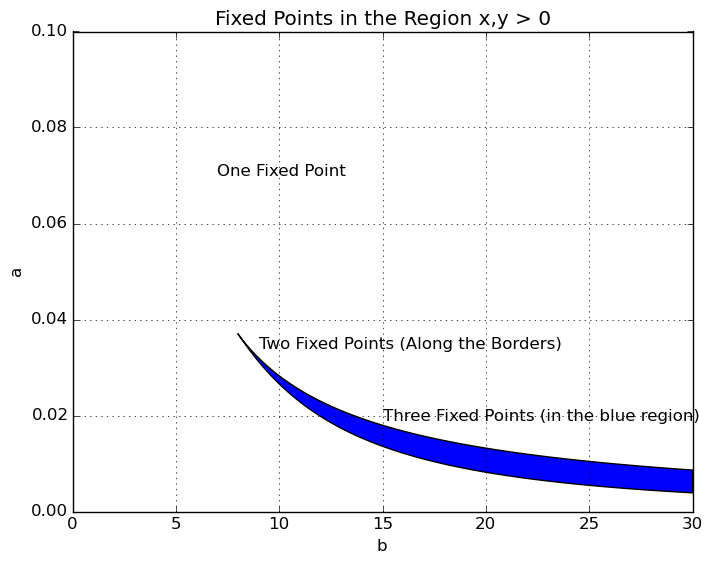

In [63]:
b = linspace(8.0,30.0,1000);
PyPlot.axis([0.0,30.0,0.0,0.1]); PyPlot.xlabel("b"); PyPlot.ylabel("a"); PyPlot.grid(true); 
PyPlot.text(7,0.07,"One Fixed Point"); PyPlot.text(15,0.019,"Three Fixed Points (in the blue region)");
PyPlot.text(9.0,0.034,"Two Fixed Points (Along the Borders)");
PyPlot.fill_between(b, aplus(b), aminus(b), facecolor="blue"); PyPlot.title("Fixed Points in the Region x,y > 0");

We have determined precisesly for what parameter values $a,b$ the system has one, two, or three fixed points.

## Linearization About Fixed Points

Recall that our system is 

$$
\dot{x} = x \left( b - x - \frac{y}{1 + x} \right)
$$
$$
\dot{y} = y \left( \frac{x}{1 + x} - a y \right)
$$

with jacobian

$
J(x,y) = \left( \begin{matrix} b - 2 x - \frac{y}{(1 + x)^2} & -\frac{x}{1+x} \\ \frac{y}{(1+x)^2} & -2 a y + \frac{x}{1+x} \\ \end{matrix} \right)$

$\tau(x,y) = b - 2x - \frac{y}{(1+x)^2} - 2ay + \frac{x}{1+x}$

$\Delta(x,y) = -2 a b y + 4 a x y + \frac{2 a  y^2}{(1 + x)^2} + \frac{b x}{1 + x} - \frac{2 x^2}{1 + x}$

## Location of Hopf Bifurcation

Let's determine under what conditions a fixed point can have trace zero.  For a fixed point to have trace zero, $a,b,x,y$ must satisfy:

$\begin{align}
\tau(x,y) & = b - 2x - \frac{y}{(1+x)^2} - 2ay + \frac{x}{1+x}\\
0 & = b - x - \frac{y}{1+x}\\
0 & = \frac{x}{1+x} - a y
\end{align}$

Since $\frac{y}{1+x} = b - x$ and $a y = \frac{x}{1+x}$ we conclude that 

$$0 = b - 2x + \frac{x - b}{1 + x} - 2\frac{x}{1+x} + \frac{x}{1+x}$$

Which simplifies to

$$ b = 2(1+x) $$.

If we subbstitute this into one of the criteria for a fixed point, $0 = b - x - \frac{y}{1+x}$, we find that $4 y = b(b+1)$.  Then, by substituting into the other criteria for a fixed point, $0 = \frac{x}{1+x} - a y$, we determine
that for a hopf bifurcation to occur, $(a,b)$ must satisfy:

$$ a = \frac{4 (b-2)}{b^2(b+2)} $$


Note that this implies that a hopf bifurcation can only occur if $b \geq 2$, since we restrict $a$ to be positive.

In [64]:
function ahopf(b)
    4*(b-2)./(b.*b.*(b + 2.0))
end

ahopf (generic function with 1 method)

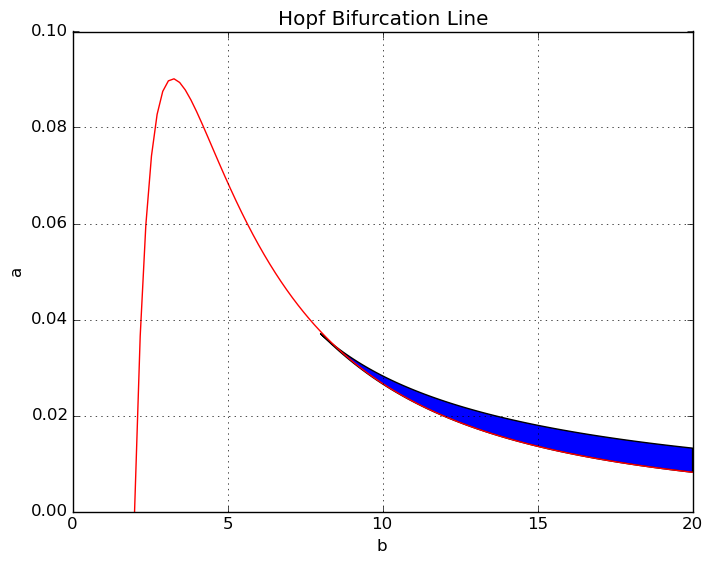

In [65]:
b = linspace(2.0,20); otherb = linspace(8.0,20.0);
PyPlot.title("Hopf Bifurcation Line");
PyPlot.plot(b,ahopf(b),color="red"); PyPlot.xlabel("b"); PyPlot.ylabel("a"); PyPlot.grid(true);
PyPlot.fill_between(otherb, aplus(otherb), aminus(otherb), facecolor="blue");PyPlot.axis([0,20,0,0.1]);

The hopf bifurcation line and the saddle-node bifurcation point look like they're very close, but off.

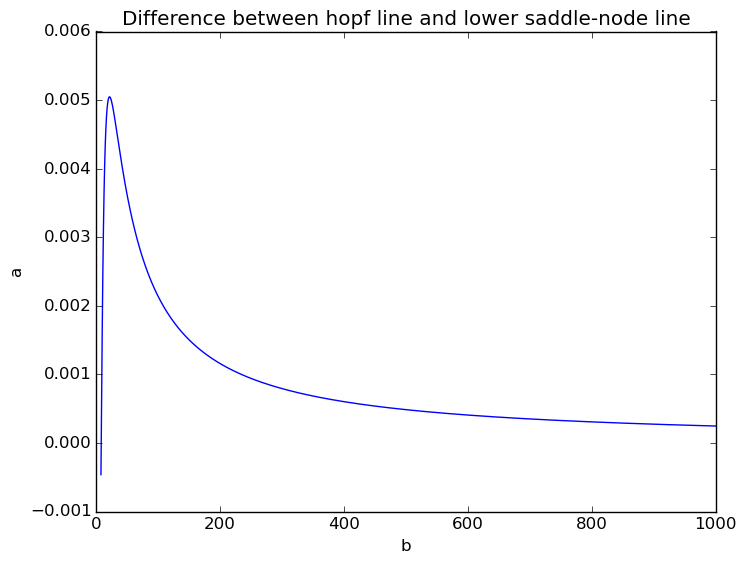

In [66]:
b = linspace(8.0,1000.0,1000); PyPlot.plot(b,aminus(b)-ahopf(b)); 
PyPlot.xlabel("b"); PyPlot.ylabel("a"); PyPlot.title("Difference between hopf line and lower saddle-node line");

We found a line along which a hopf bifurcation occurs, but we do not yet know which side is which, or what type of hopf bifurcation it is.  We can determine this numerically, by looking for a stable limit cycle in the vicinity of either side.

In [67]:
function makeproblem4(a,b)
    function problem4(t, X, Xdot)
        Xdot[1] = X[1].*(b - X[1] - X[2]./(1.0 + X[1]))
        Xdot[2] = X[2].*(X[1]./(1.0 + X[1]) - a*X[2])
    end
end

makeproblem4 (generic function with 1 method)

In [68]:
function plot_fixed(a,b,xmin,xmax,ymin,ymax,tmax,n)
    X = linspace(xmin,xmax,n) * ones(n)'
    Y = ones(n) * linspace(ymin,ymax,n)'
    m = 100
    time = linspace(0,tmax,m)
    trajs = zeros(m,2,length(X))
    for i=1:length(X)
        trajs[:,:,i] = Sundials.cvode(makeproblem4(a,b), [X[i], Y[i]], time)
    end
    [ PyPlot.plot(trajs[:,1,i],trajs[:,2,i]) for i=1:length(X)]; PyPlot.title(string("a =",a," b = ",b));
end

plot_fixed (generic function with 1 method)

The parameter values $a=0.75, b=5$ are above the curve.  Let's see what the trajetories look like there.

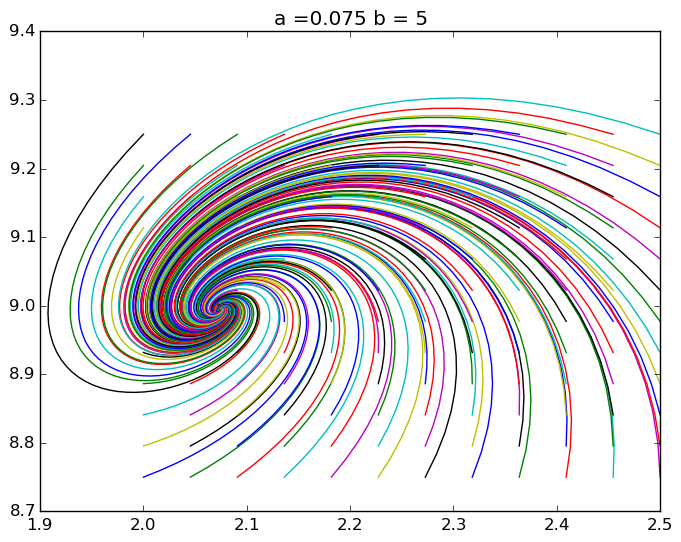

PyObject <matplotlib.text.Text object at 0xa9b0d10c>

In [69]:
plot_fixed(0.075,5,2.0,2.5,8.75,9.25,10.0,12)

It seems like there is an attracting spiral for these parameter values, above the curve.

The parameter values $a=0.62,b=5$ are below the curve.  Let's see what the trajectories look like there.

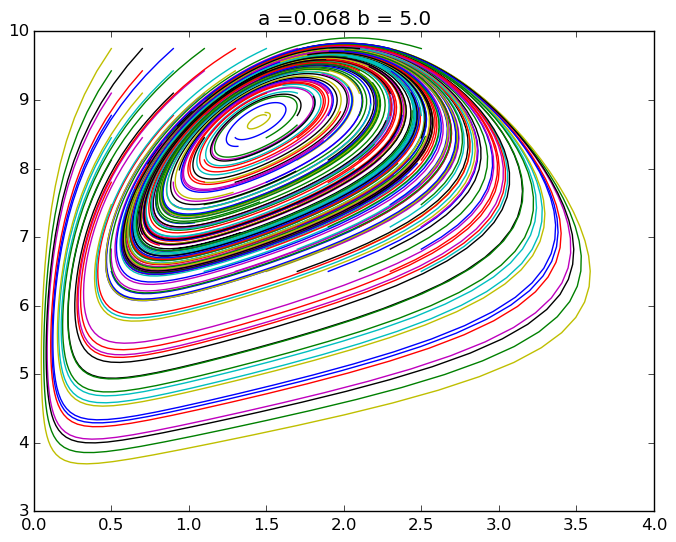

PyObject <matplotlib.text.Text object at 0xa907a2cc>

In [70]:
plot_fixed(0.068,5.0,0.5,2.5,6.5,9.75,10.0,11)

It seems like there's a repelling fixed point, and a stable limit cycle.  On one side of the bifurcation line, there is a stable spiral, and on the other side, a stable limit cycle.  We conclude that across the line $a(b) = \frac{4 (b-2)}{b^2(b+2)}$, the system undergoes a supercritical hopf bifurcation.

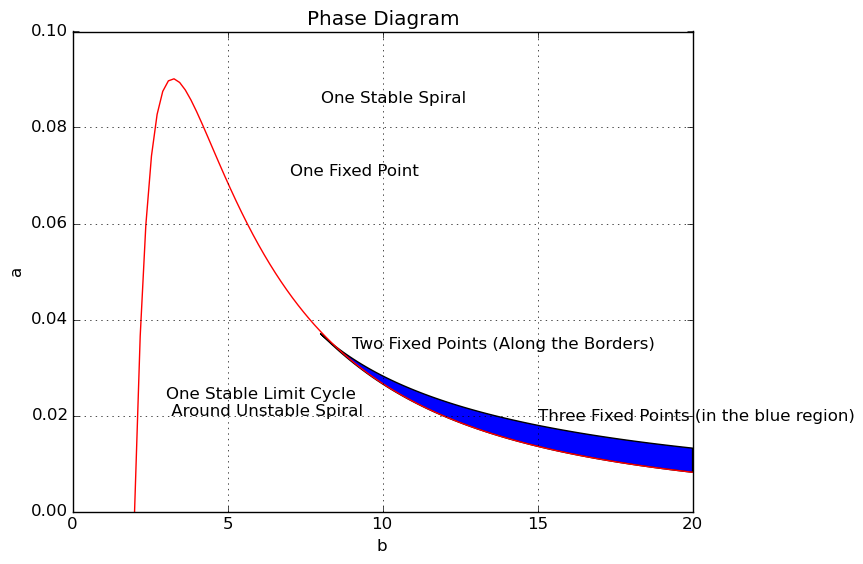

In [77]:
b = linspace(2.0,20); otherb = linspace(8.0,20.0);
PyPlot.title("Phase Diagram");
PyPlot.plot(b,ahopf(b),color="red"); PyPlot.xlabel("b"); PyPlot.ylabel("a"); PyPlot.grid(true);
PyPlot.fill_between(otherb, aplus(otherb), aminus(otherb), facecolor="blue");PyPlot.axis([0,20,0,0.1]);
PyPlot.text(7,0.07,"One Fixed Point"); PyPlot.text(15,0.019,"Three Fixed Points (in the blue region)");
PyPlot.text(9.0,0.034,"Two Fixed Points (Along the Borders)");
PyPlot.text(8,0.0852,"One Stable Spiral"); PyPlot.text(3,0.02,"One Stable Limit Cycle \n Around Unstable Spiral");

## Location of degenerate fixed point

We try to determine at which points the jacobian is degenerate.  We know that:

$\begin{align}
\Delta(x,y) & = -2 a b y + 4 a x y + \frac{2 a  y^2}{(1 + x)^2} + \frac{b x}{1 + x} - \frac{2 x^2}{1 + x}\\
0 & = b - x - \frac{y}{1+x}\\
0 & = \frac{x}{1+x} - a y
\end{align}$


We make substitutions to the first equation to arrive at the relation:

$b = \frac{2 x^2}{1 - x}$

which must be satisfied for the deteminant to be zero.  Since $b$ is a postive parameter, degenerate fixed point cannot occur at a location with x coordinate greater than 1.  We can solve for $x$ to arrive at:

$x = \frac{1}{4} \left( -b \pm \sqrt{b^2 + 8 b} \right)$

Since we restrict $x$ to be positive, we discard the negative solution and proceed with $x = \frac{1}{4} \left( -b \pm \sqrt{b^2 + 8 b} \right)$, which will always be positive for positive values of $b$.  We can use the two criteria for a fixed point to make $a$ into a function of $b$:

$a(b) = \frac{x(b)}{(1 + x(b))^2(b-x)}$

In [78]:
function a_degen(b)
    x = 0.25*(-b + sqrt(b.^2 + 8*b))
    a = x./((1 + x).^2 .* (b - x))
end

a_degen (generic function with 1 method)

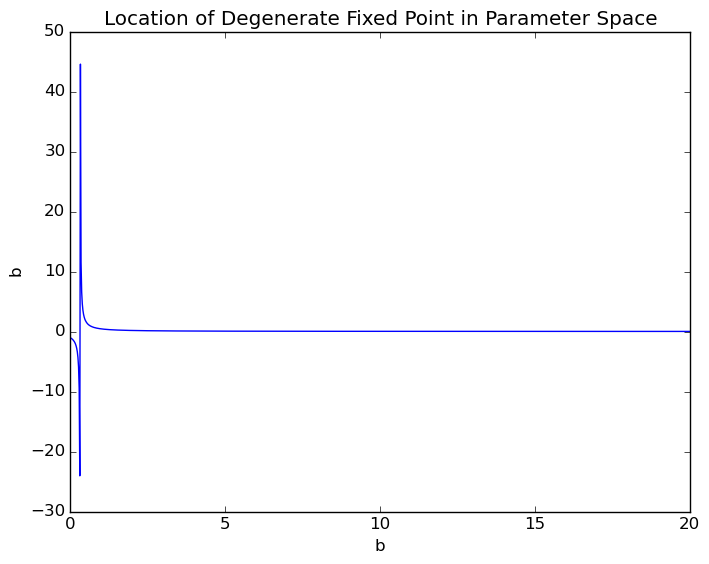

In [81]:
B = linspace(0,20,1000)
PyPlot.plot(B,a_degen(B)); PyPlot.xlabel("b"); PyPlot.ylabel("b"); PyPlot.title("Location of Degenerate Fixed Point in Parameter Space");

Putting it all together again, we find:

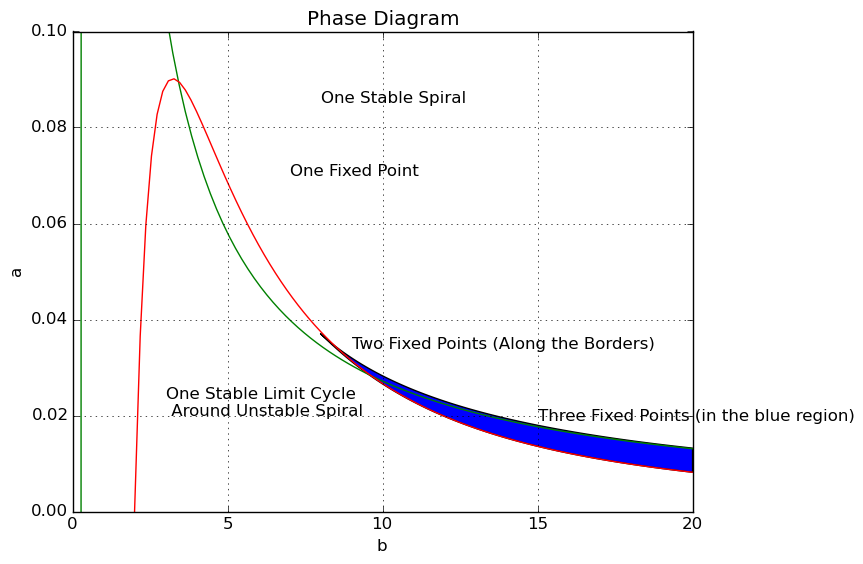

In [83]:
b = linspace(2.0,20); otherb = linspace(8.0,20.0); degenb = linspace(0.0, 20.0,100);
PyPlot.title("Phase Diagram"); PyPlot.plot(degenb,a_degen(degenb),color="green");
PyPlot.plot(b,ahopf(b),color="red"); PyPlot.xlabel("b"); PyPlot.ylabel("a"); PyPlot.grid(true);
PyPlot.fill_between(otherb, aplus(otherb), aminus(otherb), facecolor="blue");PyPlot.axis([0,20,0,0.1]);
PyPlot.text(7,0.07,"One Fixed Point"); PyPlot.text(15,0.019,"Three Fixed Points (in the blue region)");
PyPlot.text(9.0,0.034,"Two Fixed Points (Along the Borders)");
PyPlot.text(8,0.0852,"One Stable Spiral"); PyPlot.text(3,0.02,"One Stable Limit Cycle \n Around Unstable Spiral");

We see that in the x-asymptotic, the hopf bifurcation occurs at the bottom of the region with three fixed points, and the degenerate jacobian occurs at the top of the region with three fixed points.  As you cross into the three-fixed-point region from above, all of the fixed points are degenerate as they collide.  As we cross out of the three-fixed-point regime, two fixed points dissappear while the last one undergoes a hopf bifurcation.